In [68]:
from keras import models
from keras import layers
from keras.datasets import reuters

Load data

In [69]:
(train_data, train_labels), (test_data, test_labels) = \
    reuters.load_data(num_words=10000)

In [70]:
print(test_data[0])

[1, 4, 1378, 2025, 9, 697, 4622, 111, 8, 25, 109, 29, 3650, 11, 150, 244, 364, 33, 30, 30, 1398, 333, 6, 2, 159, 9, 1084, 363, 13, 2, 71, 9, 2, 71, 117, 4, 225, 78, 206, 10, 9, 1214, 8, 4, 270, 5, 2, 7, 748, 48, 9, 2, 7, 207, 1451, 966, 1864, 793, 97, 133, 336, 7, 4, 493, 98, 273, 104, 284, 25, 39, 338, 22, 905, 220, 3465, 644, 59, 20, 6, 119, 61, 11, 15, 58, 579, 26, 10, 67, 7, 4, 738, 98, 43, 88, 333, 722, 12, 20, 6, 19, 746, 35, 15, 10, 9, 1214, 855, 129, 783, 21, 4, 2280, 244, 364, 51, 16, 299, 452, 16, 515, 4, 99, 29, 5, 4, 364, 281, 48, 10, 9, 1214, 23, 644, 47, 20, 324, 27, 56, 2, 2, 5, 192, 510, 17, 12]


Prepare data

In [71]:
import numpy as np
import Funcs

x_train = Funcs.vectorize_sequences(train_data)
x_test = Funcs.vectorize_sequences(test_data)

# one_hot_train_labels = Funcs.to_one_hot(train_labels)
# one_hot_test_labels = Funcs.to_one_hot(test_labels)

y_train = np.array(train_labels)
y_test = np.array(test_labels)


Construct the network

In [72]:
model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape = (10000,)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

Compile model
'categorical_crossentropy' only applicable one-hot encoding

'categorical_crossentropy' only applicable one-hot encoding

'sparse_categorical_crossentropy' only applicable integer encoding 

In [73]:
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Slice the validation data

In [74]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

Train the model

In [75]:
history = model.fit(partial_x_train, partial_y_train, epochs=9,
                    batch_size=512, validation_data=(x_val,y_val))

Epoch 1/9
16/16 [==============================] - 2s 54ms/step - loss: 2.3308 - accuracy: 0.4815 - val_loss: 1.5072 - val_accuracy: 0.6480
Epoch 2/9
16/16 [==============================] - 1s 37ms/step - loss: 1.3320 - accuracy: 0.6976 - val_loss: 1.2796 - val_accuracy: 0.7140
Epoch 3/9
16/16 [==============================] - 0s 28ms/step - loss: 1.0194 - accuracy: 0.7622 - val_loss: 1.1212 - val_accuracy: 0.7600
Epoch 4/9
16/16 [==============================] - 0s 29ms/step - loss: 0.7951 - accuracy: 0.8171 - val_loss: 1.0769 - val_accuracy: 0.7620
Epoch 5/9
16/16 [==============================] - 1s 34ms/step - loss: 0.6535 - accuracy: 0.8470 - val_loss: 0.9417 - val_accuracy: 0.8010
Epoch 6/9
16/16 [==============================] - 1s 39ms/step - loss: 0.4992 - accuracy: 0.8827 - val_loss: 1.0397 - val_accuracy: 0.7710
Epoch 7/9
16/16 [==============================] - 0s 28ms/step - loss: 0.4131 - accuracy: 0.9085 - val_loss: 0.9164 - val_accuracy: 0.8050
Epoch 8/9
16/16 [===

Plot the training loss

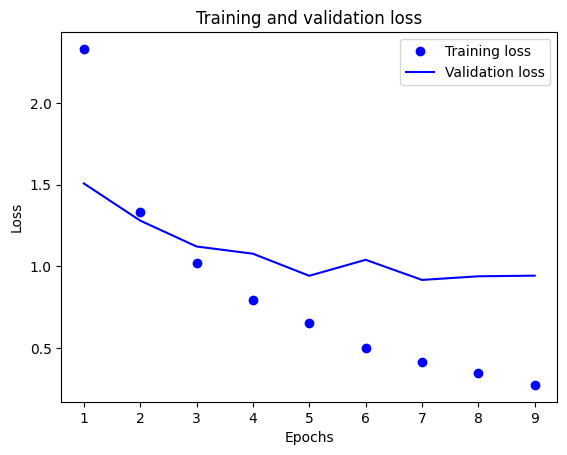

In [76]:
import matplotlib.pyplot as plt

history_dic = history.history
loss_values = history_dic['loss']
val_loss_values = history_dic['val_loss']

epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss_values, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Plot the accutacy

In [77]:
print(history_dic)

{'loss': [2.3308486938476562, 1.3320281505584717, 1.0194153785705566, 0.7950945496559143, 0.6534671187400818, 0.49918311834335327, 0.41311362385749817, 0.3481298089027405, 0.2734881639480591], 'accuracy': [0.48145827651023865, 0.6975695490837097, 0.7622149586677551, 0.8170884251594543, 0.8470308184623718, 0.8827361464500427, 0.9085442423820496, 0.9213230013847351, 0.9378601908683777], 'val_loss': [1.5072126388549805, 1.2795599699020386, 1.1211845874786377, 1.076884388923645, 0.9417288303375244, 1.0396533012390137, 0.9163916110992432, 0.9386705160140991, 0.9425064921379089], 'val_accuracy': [0.6480000019073486, 0.7139999866485596, 0.7599999904632568, 0.7620000243186951, 0.8009999990463257, 0.7710000276565552, 0.8050000071525574, 0.8040000200271606, 0.8069999814033508]}


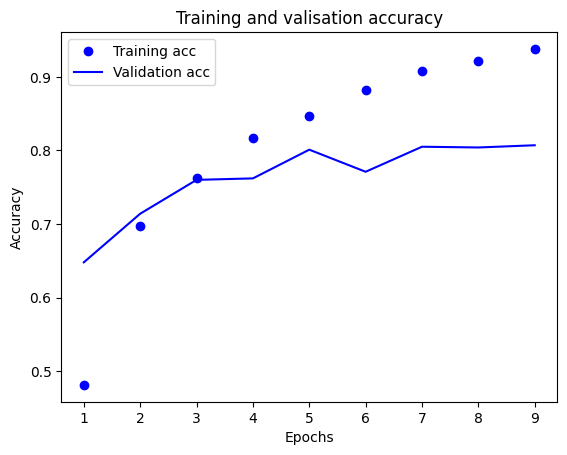

In [78]:
acc = history_dic['accuracy']
val_acc = history_dic['val_accuracy']

plt.plot(epochs, acc, 'bo', label = "Training acc")
plt.plot(epochs, val_acc, 'b', label= "Validation acc")
plt.title('Training and valisation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Evaluate the model

In [80]:
result = model.evaluate(x_test, y_test)
print(result)

71/71 [==============================] - 0s 4ms/step - loss: 1.0066 - accuracy: 0.7965
[1.0065701007843018, 0.7965271472930908]


Using the trainned model to predic

In [81]:
prediction = model.predict(x_test)
print(np.argmax(prediction[1]))

71/71 [==============================] - 0s 3ms/step
10
